In [1]:
!pip install tensorflow-gpu==2.0.0-rc2

     |████████████████████████████████| 380.8MB 38kB/s 
     |████████████████████████████████| 501kB 19.5MB/s 
     |████████████████████████████████| 3.8MB 28.9MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0-rc2'

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [8]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [0]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [11]:
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [13]:
print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


In [14]:
print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#7-2 텐서플로와 케라스를 사용하여 신경망을 만듭니다

다중 분류 신경망을 직접 구현하여 만든 모델을 훈련시키고 성능도 측정해 보았습니다만 7-1절에서 직접 만든 다중 분류 신경망 클래스는 실전에 사용할 수 있을 정도의 성능을 기대하기 어렵습니다. 높은 성능을 가진 인공신경망 모델을 만들기 위해서는 전문적인 라이브러리를 사용해야 합니다. 

대표적인 딥러닝 패키지인 구글의 텐서플로를 사용하여 인공신경망을 만들어 보겠습니다 특히 텐서플로를 좀 더 쉽게 사용하기 위한 케라스 API(Keras API)에 대해 자세히 알아보겠습니다.

----------------------
from 위키백과 

텐서플로(TensorFlow)는 다양한 작업에대해 데이터 흐름 프로그래밍을 위한(딥러닝을 위한) 오픈소스 소프트웨어 라이브러리이다. 

케라스(Keras)는 파이썬으로 작성된 오픈 소스 신경망 라이브러리이다. 더 높은 수준의 더 직관적인 추상화 집합을 표현함으로써 백엔드 과학 컴퓨팅 라이브러리임에도 불구하고 신경망을 구성하기 쉽게 만들어준다

API(Application Programming Interface, 응용 프로그램 프로그래밍 인터페이스)는 응용 프로그램에서 사용할 수 있도록, 운영 체제나 프로그래밍 언어가 제공하는 기능을 제어할 수 있게 만든 인터페이스를 뜻한다. 주로 파일 제어, 창 제어, 화상 처리, 문자 제어 등을 위한 인터페이스를 제공한다. 예) 파이썬 코드

## 1. 케라스에 대해 알아봅니다

케라스는 딥러닝 패키지를 편리하게 사용하기 위해 만들어진 래퍼(Wrapper)패키지입니다.


대표적인 딥러닝 패키지인 텐서플로, 씨아노를 사용해 신경망을 구현하려면 꽤 많은 양의 코드를 입력해야 합니다.

In [0]:
w = tf.Variable(tf.zeros(shape=(1)))
b = tf.Variable(tf.zeros(shape=(1))) # 훈련할 가중치의 변수를 선언합니다

#경사 하강법 옵티마이저를 설정합니다
optimizer = tf.optimizers.SGD(lr = 0.01)
#에포크 횟수만큼 훈련합니다
num_epochs = 10
for step in range(num_epochs):

           #자동 미분을 하여 연산 과정을 기록합니다
    with tf.GradientTape() as tape:
        z_net = w * x_train + b
        z_net = tf.reshape(z_net, [-1])
        sqr_errors = tf.square(y_train - z_net)
        mean_cost = tf.reduce_mean(sqr.errors)
    #손실 함수에 대한 가중치의 그레디언트를 계산합니다
    grads = tape.gradinet(mean_cost, [w,b])
    # 옵티마이저에 그레이디언트를 반영합니다
    optimizer.apply_gradients(zip(grads, [w,b]))

위 신경망을 케라스로 그대로 구현해보겠습니다

In [0]:
# 신경망 모델을 만듭니다
model = tf.keras.models.Sequential()
# 완전 연결층을 추가합니다
model.add(tf.keras.layers.Dense(1))
#옵티마이저와 손실함수를 지정합니다
model.compile(optimizer='sgd', loss='mse')
# 훈련 데이터를 사용하여 에포크 횟수만큼 훈련합니다
model.fit(x_train, y_train, epochs=10)

케라스로 구현하면서 코드의 양이 확 줄었습니다. 구글은 케라스를 아예 텐서플로 안에 포함시켰습니다. 텐서플로2.0에서는 아예 케라스를 텐서플로 주력 파이썬 API로 만들었습니다. 케라스의 대표 구현은 오픈 소스로 여전히 씨아노나 텐서플로를 백엔드로 지정하여 사용할 수 있습니다. 텐서플로에 구현된 tensorflow.keras 모듈은 케라스 명세를 따르는 텐서플로만을 위한 구현입니다.

---------------
프런트엔드(front-end)와 백엔드(back-end)라는 용어는 프로세스의 처음과 마지막 단계를 가리킨다. ‘프런트엔드’는 사용자로부터 다양한 형태의 입력을 받아 ‘백엔드’가 사용할 수 있는 규격을 따라 처리할 책임을 진다. 
<img src="https://github.com/legi1993/eee/blob/master/99866A335A1AB9E71B.png?raw=true" width="70%">


### 케라스를 사용하면 인공신경망의 층을 직관적으로 설계할 수 있습니다

다음과 같은 다중 분류 신경망을 만든다고 가정합니다.

<img src="https://github.com/legi1993/eee/blob/master/1573648396443-5405e8b6-38a1-4fd6-8f51-7a4c80d6f070_.jpg?raw=true" width="60%">


케라스는 인공신경망 모델을 만들기 위한 Sequential 클래스와 완전 연결층을 만들기 위한 Dense 클래스를 제공합니다. Sequential 클래스는 이름의 의미 그대로 '순차적으로 층을 쌓은 신경망 모델'이고, Dense 클래스는 모델에 포함된 완전 연결층입니다. 즉, 위의 인공신경망은 은닉층과 출력층을 Dense 클래스의 객체로 구성하고 각각의 객체를 Sequential 클래스 객체에 추가하면 완성됩니다.

앞서 직접 구현한 MultiClassNetwork 클래스의 경우 신경망 모델과 층이 명확하게 구분되지 않았습니다. 하지만 케라스는 모델과 층이 명확하게 구분됩니다. 심지어 층을 교체하기도 쉽습니다.

## 2. Sequential 클래스의 사용 방법을 알아봅니다

Sequential 클래스를 사용하는 방법은 객체를 생성할 때 층을 추가하는 방법과 객체를 생성한 후 add() 메서드를 사용하여 층을 추가하는 방법이 있습니다

### Sequential 객체에 층을 추가합니다

Dense 클래스로 만든 층을 추가할 수 있습니다. 신경망 모델에 추가할 층을 파이썬 리스트로 만들어 전달하면 Sequential 클래스의 객체가 만들어질 때 층이 추가됩니다.


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential([Dense(...),])

### add() 메서드 사용해 층을 추가합니다


In [0]:
model = Sequential()
model.add(Dense(...))
model.add(Dense(...))

## 3. Dense 클래스의 사용 방법을 알아봅니다

Dense 클래스는 객체를 생성할 때 unit, activation 매개변수를 전달해야 합니다.

### 뉴런의 개수를 지정하는 매개변수 unit

Dense 클래스에 전달해야 하는 첫 매개변수는 층의 유닛 개수입니다. 

예) 뉴런 갯수 100개

**Dense(unit=100, ...)**

### 활성화 함수를 지정하는 매개변수 activation

Dense 클래스의 두 번째 매개변수는 활성화 함수를 지정하는 activation입니다. 이 매개변수의 기본값은 None이므로 따로 지정하지 않으면 활성화 함수가 적용되지 않습니다. 활성화 함수에는 소프트맥스 함수(softmax), 하이퍼볼릭 탄젠트 함수(tanh), 렐루 함수(relu)등 많은 함수가 있습니다.

예) 시그모이드(=로지스틱) 함수 적용 

**Dense(100, activation='sigmoid')**

---------------------------
소프트맥스 함수: 로지스틱 함수를 일반화한 것

하이퍼볼릭 탄젠트 함수: 시그모이드 함수의 크기와 위치를 조절(rescale and shift)한 함수, -1 ~ 1 사이의 출력값

렐루 함수: 입력 < 0 이면 0, 입력 > 0 이면 Linear 처럼 동작. 학습속도가 셋중 가장 빠르다



## 4. 모델의 최적화 알고리즘과 손실함수를 설정합니다

모델을 혼련하기 위해서는 최적화 알고리즘이나 손실함수를 지정해야 합니다. 다중분류의 최적화 알고리즘은 경사 하강법 알고리즘을 사용하고, 손실함수는 크로스 엔트로피 손실함수를 사용합니다.

### 최적화 알고리즘을 지정하는 매개변수 optimizer

Sequential 클래스의 compile() 메서드를 사용하여 최적화 알고리즘과 손실함수를 지정합니다 

### 손실함수를 지정하는 매개변수 loss

loss= mse : 제곱오차 

loss= binary_crossentropy : 로지스틱 손실함수(카테고리가 2개인경우)

loss= catagorical_crossentropy : 크로스 엔트로피 손실함수(카테고리가 3개 이상인경우)

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')  
# 최적화 알고리즘은 매개변수 optimizer = sgd를 지정하면 경사하강법을 최적화 알고리즘으로 사용합니다. 이때 학습률의 기본값은 0.01입니다

## 5. 모델을 훈련하고 예측합니다

모델을 훈련하고 예측하는 메서드는 Sequential 클래스의 fit()메서드와 predict() 메서드 입니다. 이름뿐만 아니라 사용 방법도 비슷합니다. evaluate()메서드는 모델을 검증세트나 테스트 세트에서 평가할때 사용합니다

Sequential 클래스 사용법

In [0]:
model = Sequential()
model.add(Dense(...))
model.add(Dense(...))
model.compile(optimizer='sgd', loss='categorical_crossentropy') 
model.fit(x, y, epochs=...)
model.predict(x)
model.evalute(x,y)

##6. 케라스로 다중 분류 신경망을 만들어봅니다

케라스로 다중 분류 신경망을 만든 다음 패션 MNIST 데이터 세트로 모델을 훈련해 보겠습니다.

### 6-1. 모델 생성하기

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

###6-2. 은닉층과 출력층을 모델에 추가하기
MultiClassNetwork 클래스로 만든 것과 동일한 크기의 신경망을 만듭니다

은닉층 유닛: 100개, 시그모이드 함수

출력층 유닛: 10개, 소프트맥스 함수


In [0]:
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# 은닉층에는 input_shape에 입력데이터 크기를 지정해야합니다. 이때 입력 행렬의 첫 번째 차원은 입력 데이터의 갯수이므로 나머지 차원만 (784,)형태로 입력합니다

###6-3. 최적화 알고리즘과 손실 함수 지정하기

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# sgd 경사하강법, categorical_crossentropy 크로스 엔트로피 손실함수

metrics 매개변수는 훈련 과정기록으로 정확도를 남기기 위해 추가한 것입니다. 이 매개변수를 지정하지 않으면 History 객체에 기본값으로 손실값(loss)이 기록되는데, 모델의 정확도에 대한 기록도 살펴봐야 하므로 accuracy를 추가했습니다

###6-4. 모델 훈련하기

fit() 메서드를 통해 모델을 40번의 에포크 동안 훈련합니다.  훈련 세트와 검증 세트에서 측정한 값들을 History 클래스 객체에 담아 반환합니다. 훈련하는 동안 검증세트에 대한 손실과 정확도를 계산할 수 있습니다. 

이를 위해 validation_data 매개변수에 검증세트를 튜플로 전달합니다. 

In [19]:
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 5s 97us/sample - loss: 1.3982 - accuracy: 0.6410 - val_loss: 0.9773 - val_accuracy: 0.7394
Epoch 2/40
48000/48000 [==============================] - 4s 84us/sample - loss: 0.8527 - accuracy: 0.7467 - val_loss: 0.7561 - val_accuracy: 0.7676
Epoch 3/40
48000/48000 [==============================] - 4s 81us/sample - loss: 0.7135 - accuracy: 0.7681 - val_loss: 0.6644 - val_accuracy: 0.7783
Epoch 4/40
48000/48000 [==============================] - 4s 81us/sample - loss: 0.6453 - accuracy: 0.7832 - val_loss: 0.6118 - val_accuracy: 0.7916
Epoch 5/40
48000/48000 [==============================] - 4s 83us/sample - loss: 0.6026 - accuracy: 0.7946 - val_loss: 0.5759 - val_accuracy: 0.8011
Epoch 6/40
48000/48000 [==============================] - 4s 83us/sample - loss: 0.5724 - accuracy: 0.8047 - val_loss: 0.5493 - val_accuracy: 0.8129
Epoch 7/40
48000/48000 [==============================] 

###6-5. 손실과 정확도 그래프 그리기

History 딕셔너리의 키를 출력해 보면 어떤 측정 지표들이 들어 있는지 알 수 있습니다

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


훈련 세트와 검증 세트에서의 손실을 나타내는 loss, val_loss가 있고 정확도를 의미하는 accuracy, val_accuracy가 있습니다. 

그래프를 그려보겠습니다

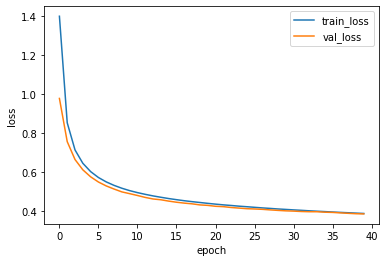

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()


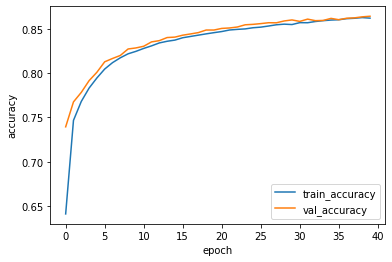

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

###6-6. 검증 세트 정확도 계산하기

evaluate() 메서드를 사용하면 손실값과 metrics 매개변수에 추가한 측정 지표를 계산하여 반환합니다. 

In [24]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(loss, accuracy)

0.3859575534661611 0.86441666


정확도가 약 81%로 케라스로 구현한 다중 분류 신경망이 MultiClassNetwork에 비해 성능이 크게 좋지 않은 이유는 이미지 데이터에 잘 맞는 모델이 아니기 때문입니다.

